# 31. 아파트 매매가격지수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('../data/added_features/월간 아파트 매매가격지수_20240717.xlsx')

In [3]:
df

,지역명,1986-01-01 09:00:52,1986-02-01 09:00:52,1986-03-01 09:00:52,1986-04-01 09:00:52,1986-05-01 09:00:52,1986-06-01 09:00:52,1986-07-01 09:00:52,1986-08-01 09:00:52,1986-09-01 09:00:52,...,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52
0,전국,15.910037,15.910037,15.880737,15.792836,15.675635,15.587735,15.499834,15.470534,15.499834,...,90.088355,90.171682,90.177104,90.080022,89.940106,89.842256,89.697577,89.503353,89.387179,89.302354
1,서울,12.634687,12.656584,12.634687,12.547098,12.481406,12.350023,12.306228,12.306228,12.328126,...,90.577885,90.786965,90.821491,90.725487,90.551125,90.442043,90.307675,90.158002,90.129838,90.241606
2,강북14개구,17.654568,17.625626,17.596684,17.480916,17.249381,17.249381,17.249381,17.249381,17.307265,...,88.564576,88.646116,88.599421,88.469239,88.295146,88.166386,88.016196,87.819360,87.738587,87.822147
3,종로구,-,-,-,-,-,-,-,-,-,...,97.51826,97.668012,97.824401,97.840228,97.749291,97.721400,97.576362,97.635306,97.546511,97.806351
4,중구,-,-,-,-,-,-,-,-,-,...,92.560336,92.681998,92.697369,92.850743,92.961422,92.875528,92.924594,92.707253,92.651911,92.971540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,무주군,-,-,-,-,-,-,-,-,-,...,100.471974,100.865982,100.865982,100.865982,100.865982,98.809108,97.003559,97.003559,97.003559,97.003559
274,임실군,-,-,-,-,-,-,-,-,-,...,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,102.830430
275,순창군,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,98.786649,98.786649,98.786649,98.786649,98.786649
276,고창군,-,-,-,-,-,-,-,-,-,...,113.541742,113.541742,113.630492,113.668445,113.711387,113.668124,115.349433,117.355832,117.967587,118.421120


In [4]:
cols = df.columns
cols = [int(str(col)[:10].replace('-', '')[:6]) for col in cols[1:]]

In [5]:
cols.insert(0, '지역명')
cols

['지역명',
 198601,
 198602,
 198603,
 198604,
 198605,
 198606,
 198607,
 198608,
 198609,
 198610,
 198611,
 198612,
 198701,
 198702,
 198703,
 198704,
 198705,
 198706,
 198707,
 198708,
 198709,
 198710,
 198711,
 198712,
 198801,
 198802,
 198803,
 198804,
 198805,
 198806,
 198807,
 198808,
 198809,
 198810,
 198811,
 198812,
 198901,
 198902,
 198903,
 198904,
 198905,
 198906,
 198907,
 198908,
 198909,
 198910,
 198911,
 198912,
 199001,
 199002,
 199003,
 199004,
 199005,
 199006,
 199007,
 199008,
 199009,
 199010,
 199011,
 199012,
 199101,
 199102,
 199103,
 199104,
 199105,
 199106,
 199107,
 199108,
 199109,
 199110,
 199111,
 199112,
 199201,
 199202,
 199203,
 199204,
 199205,
 199206,
 199207,
 199208,
 199209,
 199210,
 199211,
 199212,
 199301,
 199302,
 199303,
 199304,
 199305,
 199306,
 199307,
 199308,
 199309,
 199310,
 199311,
 199312,
 199401,
 199402,
 199403,
 199404,
 199405,
 199406,
 199407,
 199408,
 199409,
 199410,
 199411,
 199412,
 199501,
 199502,
 1

In [6]:
df.columns = cols

In [7]:
df

,지역명,198601,198602,198603,198604,198605,198606,198607,198608,198609,...,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
0,전국,15.910037,15.910037,15.880737,15.792836,15.675635,15.587735,15.499834,15.470534,15.499834,...,90.088355,90.171682,90.177104,90.080022,89.940106,89.842256,89.697577,89.503353,89.387179,89.302354
1,서울,12.634687,12.656584,12.634687,12.547098,12.481406,12.350023,12.306228,12.306228,12.328126,...,90.577885,90.786965,90.821491,90.725487,90.551125,90.442043,90.307675,90.158002,90.129838,90.241606
2,강북14개구,17.654568,17.625626,17.596684,17.480916,17.249381,17.249381,17.249381,17.249381,17.307265,...,88.564576,88.646116,88.599421,88.469239,88.295146,88.166386,88.016196,87.819360,87.738587,87.822147
3,종로구,-,-,-,-,-,-,-,-,-,...,97.51826,97.668012,97.824401,97.840228,97.749291,97.721400,97.576362,97.635306,97.546511,97.806351
4,중구,-,-,-,-,-,-,-,-,-,...,92.560336,92.681998,92.697369,92.850743,92.961422,92.875528,92.924594,92.707253,92.651911,92.971540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,무주군,-,-,-,-,-,-,-,-,-,...,100.471974,100.865982,100.865982,100.865982,100.865982,98.809108,97.003559,97.003559,97.003559,97.003559
274,임실군,-,-,-,-,-,-,-,-,-,...,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,104.540715,102.830430
275,순창군,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,98.786649,98.786649,98.786649,98.786649,98.786649
276,고창군,-,-,-,-,-,-,-,-,-,...,113.541742,113.541742,113.630492,113.668445,113.711387,113.668124,115.349433,117.355832,117.967587,118.421120


In [8]:
origin_df = pd.read_csv('../data/preprocessed/27_school_district.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_26417/2769093726.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_df = pd.read_csv('../data/preprocessed/27_school_district.csv')


In [9]:
district_list = origin_df['구'].unique().tolist()
print(len(district_list))
district_list

25


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

# 구별로 데이터 프레임을 따로 추출한다.

In [10]:
df_list = []

for district in district_list:
    df_list.append(df[df['지역명']==district])

In [11]:
for i in range(25):
    tmp = df_list[i].drop(['지역명'], axis=1)
    tmp = pd.DataFrame(tmp.iloc[0])
    tmp.reset_index(inplace=True)
    tmp.columns = ['년도월', '매매가격 지수']
    df_list[i] = tmp

In [12]:
for i in range(25):
    df_list[i] = df_list[i].iloc[252:].reset_index(drop=True)

In [13]:
df_list[0]

,년도월,매매가격 지수
0,200701,62.971521
1,200702,62.873459
2,200703,62.755302
3,200704,62.210519
4,200705,61.760044
...,...,...
205,202402,97.183768
206,202403,97.107117
207,202404,97.108001
208,202405,97.224005


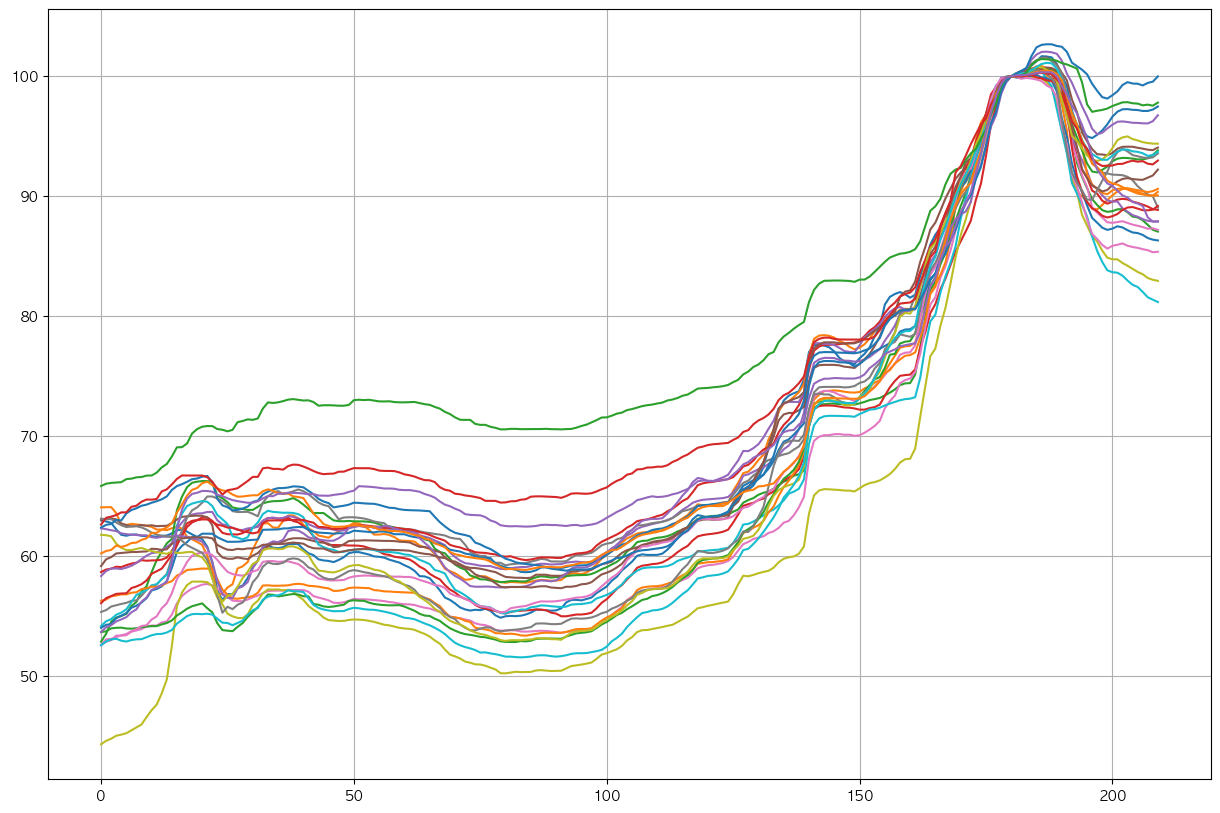

In [14]:
plt.figure(figsize=(15, 10))
for i in range(25):
    df_list[i]['매매가격 지수'].plot()
plt.grid(True)

# 원본에 적용

In [15]:
origin_df_split_list = []

for district in district_list:
    origin_df_split_list.append(origin_df[origin_df['구'] == district])

In [16]:
origin_df_split_list[0]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,포레,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,포레,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,포레,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,기타,3호선,강남구,대우,4839.238469,18.0,잠실대교,0.0,0,8.0


In [17]:
def mapping(one_of_df, one_of_origin_df):
    mapping_ = pd.Series({ym: value for ym, value in zip(one_of_df['년도월'], one_of_df['매매가격 지수'])})

    one_of_origin_df['매매가격 지수'] = np.nan
    one_of_origin_df['매매가격 지수'] = one_of_origin_df['매매가격 지수'].fillna(one_of_origin_df['계약년월']).map(mapping_)

    return one_of_origin_df

In [18]:
for i in range(25):
    origin_df_split_list[i] = mapping(df_list[i], origin_df_split_list[i])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_26417/1074140007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_of_origin_df['매매가격 지수'] = np.nan
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_26417/1074140007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_of_origin_df['매매가격 지수'] = one_of_origin_df['매매가격 지수'].fillna(one_of_origin_df['계약년월']).map(mapping_)
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_26417/1074140007.py:4: SettingWithCopyWarning: 
A value

In [19]:
origin_df_split_list[0]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군,매매가격 지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,69.049924
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,69.049924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0,95.993766
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0,95.993766
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,3호선,강남구,현대,3984.052508,18.0,잠실대교,0.0,0,8.0,95.993766
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,3호선,강남구,대우,4839.238469,18.0,잠실대교,0.0,0,8.0,95.482886


In [20]:
origin_df = pd.concat([one_of_origin_df for one_of_origin_df in origin_df_split_list]).sort_index()

In [21]:
origin_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군,매매가격 지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,67.392545
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,69.049924
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0,69.049924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0,91.623694
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0,91.623694
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0,91.066919
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0,90.861265


In [22]:
origin_df.to_csv('../data/preprocessed/32_selling_point.csv', index=False)